# Homework 2

In [27]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.optimize import fmin, minimize

## Introducing `minimize`

`scipy.optimize.minimize` gives you a bit more information about the fit than fmin. You can even pick the algorithm to do minimization(read the doc if you are interested).

In [28]:
def f(w):
    x, y = w
    return (x-2)**2 + (y-3)**2

bestw = minimize(f, [100,100])
print bestw
#the two important properties are 
#`.x` which give the value of argument that minimize the function
#`.fun` which tell you the value of the function that 
#hesss stands for hessian and jac stands for jacobian. 
# They can be use to find 1 std dev error and correlation between the result among other things.
#I won't get in to it here.

#For this homework try use minimize instead of fmin

print bestw.x
print bestw.fun

   status: 0
  success: True
     njev: 4
     nfev: 16
 hess_inv: array([[ 0.74743596, -0.24998685],
       [-0.24998685,  0.75256404]])
      fun: 1.1105851776989653e-16
        x: array([ 1.99999999,  2.99999999])
  message: 'Optimization terminated successfully.'
      jac: array([  7.56144025e-11,  -8.00683964e-11])
[ 1.99999999  2.99999999]
1.1105851777e-16


# Problem 1 Exponential loss function.

Recall that in the class we did linear regression using euclidean distance loss function.

$$ f(y') = (y-y')^2 $$

In this problem, we want to investigate a different loss function.

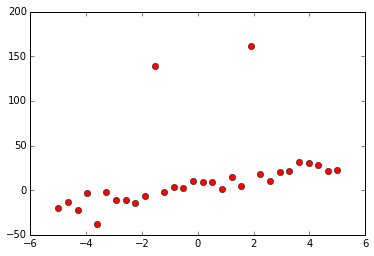

In [29]:
np.random.seed(54321)
ndata = 30
datax = np.linspace(-5,5,ndata)
datay = 5*datax + 3. + np.random.randn(ndata)*10
#do not remove these two lines
datay[10] = datay[10] + 150
datay[20] = datay[20] + 150

plt.plot(datax, datay,'or')

1a) One of these two function is has the right behavior for being a loss function. Identify the suitable one and explain why.

$$ f(y') =  -e^{-(y-y')^2} $$

$$ g(y') =  e^{-(y-y')^2} $$

where $y'$ is the guess and $y$ is an actual datapoint.

$$---------------------------------------------------------------$$
If $ (y - y')^2 $ is large, then the cost should be high $$$$
If $ (y - y')^2 $ is small, then the cost should be small

$ e^{-"LargeNumber"} = \frac{1}{e^{"LargeNumber"}} = $ small number $$$$
$ e^{-"SmallNumber"} = \frac{1}{e^{"SmallNumber"}} = $ large number

So $ f(y') $ is the more suitable one
$$---------------------------------------------------------------$$

1b) (5)Fit a straight line to the data in `datax` and `datay` with old square cost function. (Do a least square fit)

Start your minimization at [5,3].

Then plot and compare your line with actual data.

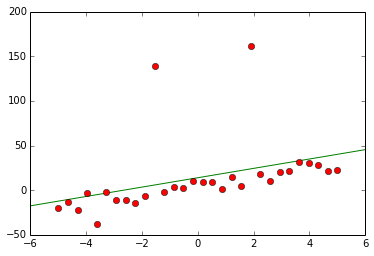

In [143]:
def padAll(x):
    l = len(x)
    tmp = np.empty((l, 2))
    tmp[:, 0] = 1
    tmp[:, 1] = x
    return tmp

pdatax = padAll(datax)

def cost(ws):
    tmp = 0
    for i in xrange(datay.size):
        guess = np.dot(ws, pdatax[i])
        tmp += (datay[i] - guess)**2
    return tmp

bestw = minimize(cost, [5, 3])
oldW = bestw

xx = np.linspace(-6, 6, 100)
xxx = padAll(xx)
yy = np.dot(xxx, bestw.x)

plt.plot(xx, yy, 'g')
plt.plot(datax, datay,'or')

1c) (80) Fit a straight line to the following data with the cost function you justify in *1a)*.

Start your minimization at [5,3].

Then plot and compare your line with actual data.

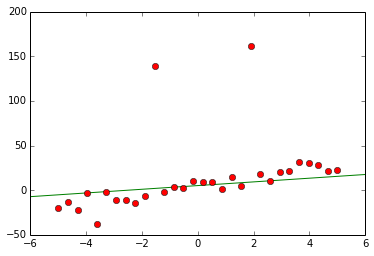

In [144]:
def costNew(ws):
    return np.sum([-np.exp(-(datay[i] - np.dot(ws, pdatax[i]))**2) for i in xrange(datay.size)])


bestw = minimize(costNew, [5, 3])
newW = bestw

xx = np.linspace(-6, 6, 100)
xxx = padAll(xx)
yy = np.dot(xxx, bestw.x)


plt.plot(xx, yy, 'g')

plt.plot(datax, datay,'or')

1d) (5) Which one is a better line?

You will find that what you had in 1c) will sort of ignore the two outliers. 

Explain why does the loss function we use in 1c) behave in such a way.

In [150]:
print cost(oldW.x)
print cost(newW.x)

40817.9945017
45828.0326491


The square cost function is better

1e) (5) Repeat 1b) but now start at (5, 33). Do you get the same $\vec{w}$?

[ 13.92642954   5.24310109]
40817.9945017


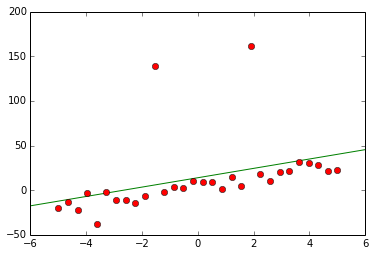

In [119]:
def padAll(x):
    l = len(x)
    tmp = np.empty((l, 2))
    tmp[:, 0] = 1
    tmp[:, 1] = x
    return tmp

pdatax = padAll(datax)

def cost(ws):
    tmp = 0
    for i in xrange(datay.size):
        guess = np.dot(ws, pdatax[i])
        tmp += (datay[i] - guess)**2
    return tmp

bestw = minimize(cost, [5, 33])
print bestw.x
print bestw.fun

xx = np.linspace(-6, 6, 100)
xxx = padAll(xx)
yy = np.dot(xxx, bestw.x)

plt.plot(xx, yy, 'g')
plt.plot(datax, datay,'or')

1f) Extra (5) Repeat 1c) but now start at (5, 33). You will find that you line is way off. Explain why? (Hint1: numerical issue) (Hint2: look at `.fun` from minimize)

[  7.44975549  33.42237164]
8.09298576075e-07
[  3.81259888  32.79527564]
-1.0


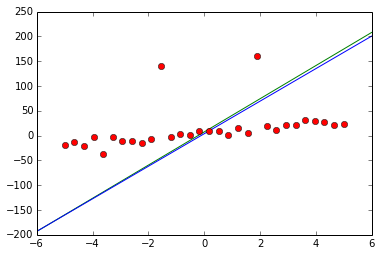

In [7]:
def cost(ws):
    tmp = 0
    for i in xrange(datay.size):
        guess = np.dot(ws, pdatax[i])
        tmp += np.exp(-(datay[i] - guess)**2)
    return tmp

def cost_z(ws):
    tmp = 0
    for i in xrange(datay.size):
        guess = np.dot(ws, pdatax[i])
        tmp += -np.exp(-(datay[i] - guess)**2)
    return tmp

bestw = minimize(cost, [5, 33])
bestz = minimize(cost_z, [5, 33])
print bestw.x
print bestw.fun

print bestz.x
print bestz.fun

xx = np.linspace(-6, 6, 100)
xxx = padAll(xx)
yy = np.dot(xxx, bestw.x)

zz = np.dot(xxx, bestz.x)

plt.plot(xx, yy, 'g')
plt.plot(xx, zz, 'b')
plt.plot(datax, datay,'or')

# Problem 2

Consider ther following data.

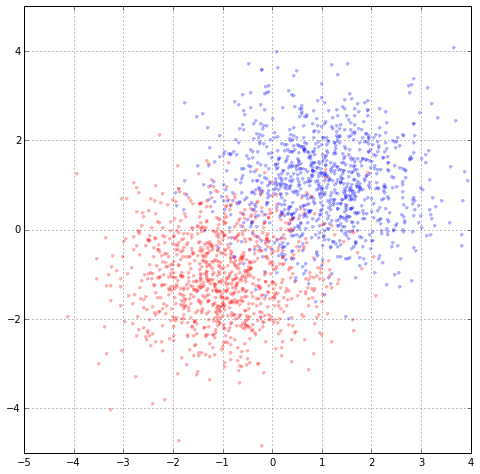

In [8]:
np.random.seed(9999)
ndata = 1000

#class +1
dataxp = np.random.randn(ndata)+1
datayp = np.random.randn(ndata)+1

#class -1
dataxm = np.random.randn(ndata)-1
dataym = np.random.randn(ndata)-1

plt.figure(figsize=(8,8))
plt.plot(dataxp, datayp, '.b', alpha=0.3)
plt.plot(dataxm, dataym, '.r', alpha=0.3)
plt.xlim(-5,4)
plt.xlim(-5,4)
plt.grid(True)

2a) (50) Perform Logistic Regression like we did in class. Find $\vec{w}$

In [36]:
class LogisticRegression:
    def __init__(self, sign):
        self.w = None
        
    def train(self, features, classes):
        def cost(w):
            s = np.dot(features, w)
            s = np.clip(s, -200, 200)
            return np.sum(np.log1p(np.exp(-classes*s)))
        self.w = minimize(cost, [0.]*len(features[0])).x
        
    def classify(self, features):
        s = np.dot(features, self.w)
        s = np.clip(s, -200, 200)
        return 1./(1 + np.exp(-s))
    
#     def classifypm(self, features):
#         return (self.classify(features) - 0.5)*2

In [37]:
def padAndCombined(datax, datay):
    data = np.zeros((len(datax),3))
    data[:, 0] = 1.
    data[:, 1] = datax
    data[:, 2] = datay
    return data
datap = padAndCombined(dataxp, datayp)
datam = padAndCombined(dataxm, dataym)
data = np.concatenate((datap, datam), axis=0)
classes = np.array([1]*1000 + [-1]*1000)

# print len(datap), len(datam), len(data)
# print datap[0], datam[0]
# print data[0], data[1000]
print classes

[ 1  1  1 ..., -1 -1 -1]


In [39]:
LR = LogisticRegression(1)
LR.train(data, classes)
print LR.w

right = 0
for p in datap:
    if (LR.classify(p) >= 0.5):
        right += 1
for m in datam:
    if (LR.classify(m) < 0.5):
        right += 1
print right/2000.0
    


[-0.00456103  1.85812441  2.21308509]
0.92


2b) (50) You will find that it's quite hard to check the answer. One way to do that is to draw a line with 0.5 probability.

Draw a line of 0.5 probability along with data points. Does it match with what you expectation?

Hint: think about $\theta$ and how to get $\theta$ to return 0.5.

Hint2: it has something to do with $\vec{w}$.

Hint3: It is a straight line.

In [40]:
# LR.getHalf(data)
# print LR.half
# right = 0
# for p in datap:
#     if (LR.classify(p, LR.half) >= 0.5):
#         right += 1
# for m in datam:
#     if (LR.classify(m, LR.half) < 0.5):
#         right += 1
# print right/2000.0

In [41]:
def calYs(w, p, xs):
    c, m, k = w
    
    rh = -np.log((1./p) - 1.)
    
    ys = []
    for x in xs:
        ys.append((c + m*x + rh)/(-k))
        
    return np.array(ys)

In [42]:
xs = np.linspace(-5, 5, len(data))
ys = calYs(LR.w, 0.5, xs)

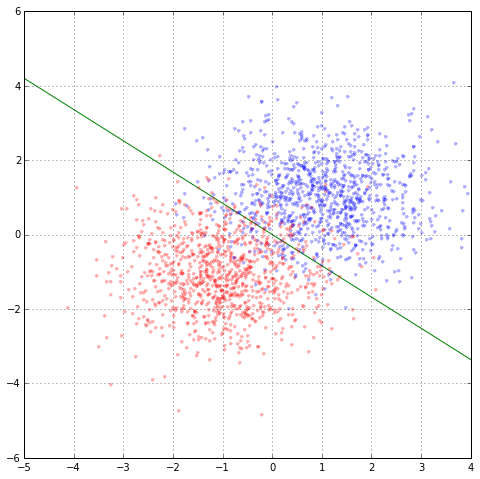

In [43]:
plt.figure(figsize=(8,8))
plt.plot(xs, ys, 'g')
plt.plot(dataxp, datayp, '.b', alpha=0.3)
plt.plot(dataxm, dataym, '.r', alpha=0.3)
plt.xlim(-5,4)
plt.xlim(-5,4)
plt.grid(True)

2c) (50) Draw lines of probability 0.1, 0.2 ... 0.9 along with data points.

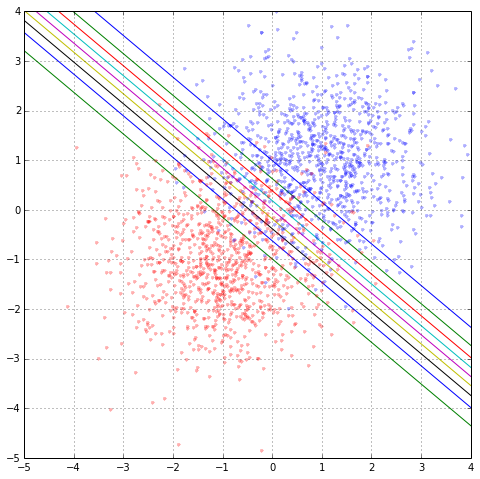

In [154]:


plt.figure(figsize=(8,8))

xs = np.linspace(-5, 5, len(data))
p = 0.1
while p < 0.9:
    ys = calYs(LR.w, p, xs)
    plt.plot(xs, ys)
    p += 0.1

plt.plot(dataxp, datayp, '.b', alpha=0.3)
plt.plot(dataxm, dataym, '.r', alpha=0.3)
plt.xlim(-5,4)
plt.ylim(-5,4)
plt.grid(True)

2d) (50) Draw ROC curve. Use these as test sample.

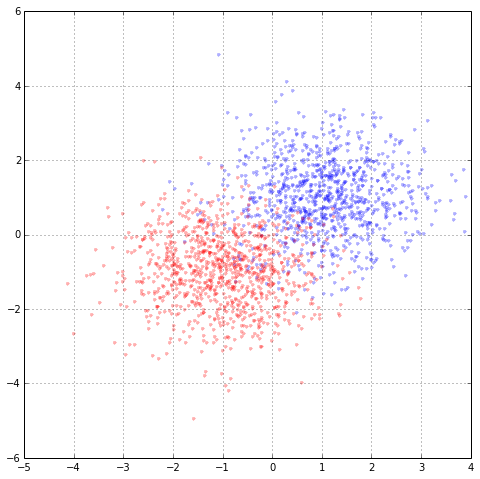

In [45]:
np.random.seed(1111)
ndata = 1000

#class +1
testxp = np.random.randn(ndata)+1
testyp = np.random.randn(ndata)+1

#class -1
testxm = np.random.randn(ndata)-1
testym = np.random.randn(ndata)-1

plt.figure(figsize=(8,8))
plt.plot(testxp, testyp, '.b', alpha=0.3)
plt.plot(testxm, testym, '.r', alpha=0.3)
plt.xlim(-5,4)
plt.xlim(-5,4)
plt.grid(True)

In [155]:
size = 100
FalseNegative = np.zeros((1, size))
FalsePositive = np.zeros((1, size))
thresholds = np.linspace(0.01, 0.99, size)
for idx in xrange(len(testxp)):
    pp = LR.classify(np.array([1, testxp[idx], testyp[idx]]))
    pm = LR.classify(np.array([1, testxm[idx], testym[idx]]))
    

    for i in xrange(size):
        if (pp <= thresholds[i]):
            FalseNegative[0][i] += 1
        if (pm > thresholds[i]):
            FalsePositive[0][i] += 1

for i in xrange(size):
    FalseNegative[0][i] = FalseNegative[0][i]/len(testxp)
    FalsePositive[0][i] = FalsePositive[0][i]/len(testxp)




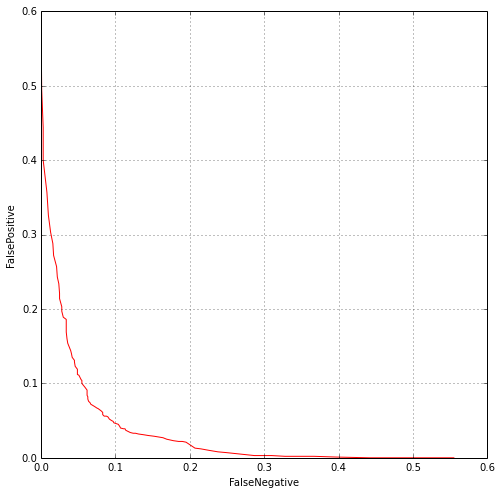

In [156]:
plt.figure(figsize=(8,8))
plt.plot(FalseNegative[0], FalsePositive[0], 'r')
plt.xlabel("FalseNegative")
plt.ylabel("FalsePositive")
plt.grid(True)